In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import rc
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../')


%matplotlib inline


# sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_palette("deep")
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
rc('text', usetex=True)
rc("savefig", dpi=300)
rc("figure", dpi=192)
rc('lines', linewidth=2)

plt.rcParams['figure.figsize'] = 6, 4


pd.options.display.max_columns = 999
pd.options.display.max_rows = 400


from datetime import datetime
str(datetime.now())

import h5py

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
L = pd.read_excel('../../measurements/Chapra and Dolan paper/Lake_Erie_TP_Basin_Loads.xlsx')

In [3]:
L.columns

Index(['Year', 'WB', 'CB', 'EB', 'From Huron', 'Total Load', 'Outflow Niagra'], dtype='object')

In [4]:
Precip_mm = pd.read_excel('../../measurements/glerl/Precip_Basin.xlsx', sheetname='ERI_mm', skiprows=3)

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


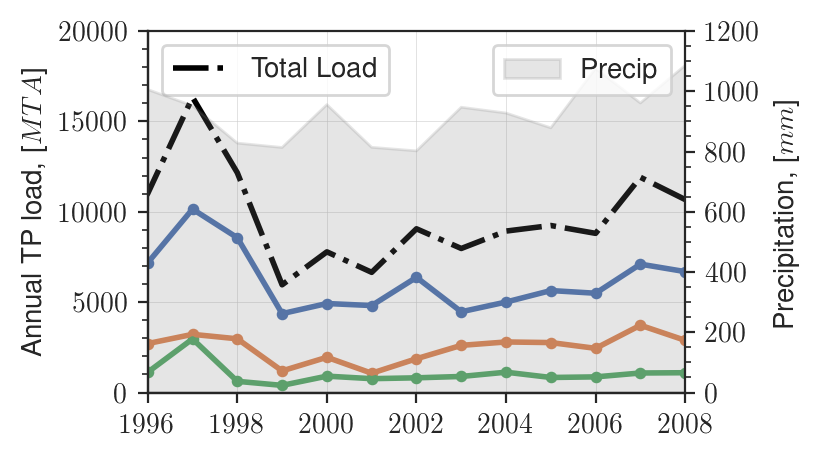

In [5]:
fig, (ax) = plt.subplots(1,1, figsize=(5*0.8,3*0.8), dpi=200)
ax.plot(L.Year, L.WB+L['From Huron'], lw=2, label=None)
ax.scatter(L.Year, L.WB+L['From Huron'], s=10, label=None)
ax.plot(L.Year, L.CB, lw=2,label='')
ax.scatter(L.Year, L.CB, s=10, label='')
ax.plot(L.Year, L.EB, lw=2,label='')
ax.scatter(L.Year, L.EB, s=10, label='')
ax.plot(L.Year, L['Total Load'], 'k-.',lw=2 ,label='Total Load')
ax.legend(frameon=1, loc=2)
ax.set_ylim(0,20000)
ax.grid(lw=0.2)
ax.set_xlim(1996, 2008)
ax.set_ylabel('Annual TP load, [$MTA$]')
sns.despine(offset=0, trim=True)
ax2 = ax.twinx()
ax2.fill_between(Precip_mm.Year, Precip_mm.Total, color='grey', alpha=0.2)
ax2.set_ylim(0,1200)
ax.get_yaxis().set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax2.get_yaxis().set_minor_locator(matplotlib.ticker.AutoMinorLocator())
plt.tight_layout()
ax2.legend(['Precip'], loc=1, frameon=1)
ax2.set_ylabel('Precipitation, [$mm$]')
fig.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/latex/img/LE_load.pdf')

In [6]:
TP = pd.read_excel('../GLENDA/LE_BasinAv_April_GLNPO.xlsx')

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


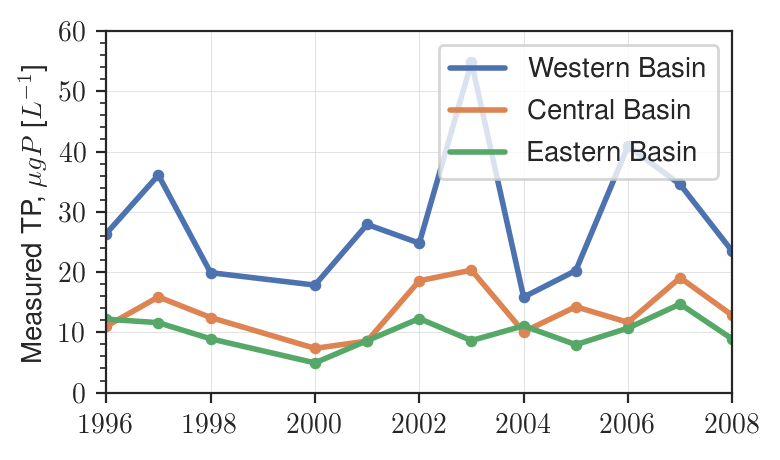

In [7]:
fig, (ax) = plt.subplots(1,1, figsize=(5*0.8,3*0.8), dpi=200)
ax.plot(TP.Year, TP.WB, lw=2, label='Western Basin')
ax.scatter(TP.Year, TP.WB, s=10, label=None)
ax.plot(TP.Year, TP.CB, lw=2, label='Central Basin')
ax.scatter(TP.Year, TP.CB, s=10, label=None)
ax.plot(TP.Year, TP.EB, lw=2, label='Eastern Basin')
ax.scatter(TP.Year, TP.EB, s=10, label=None)
ax.legend(frameon=1, loc=1)
ax.set_ylim(0,60)
ax.grid(lw=0.2)
ax.set_xlim(1996, 2008)
ax.get_yaxis().set_minor_locator(matplotlib.ticker.AutoMinorLocator())
plt.ylabel('Measured TP, $\mu gP$ [$L^{-1}$]')
# sns.despine(offset=0, trim=True)
plt.tight_layout()
# plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/latex/img/LE_TP.pdf')

In [8]:
def vollenweider_model(tau, z_av, V, Q, a, L):
    sigma = a/z_av

    Q = Q*60*60*24*365 #m3 yr-1
    TP_load = L*1e3*1e3*1e3 # MTA -> mg

    TP_in = TP_load/Q #mg m-3

    TP = TP_in/(1+sigma*tau)
    NS = sigma * V *TP
    print("%.1f & %.1f & %.1f," % (NS*1e-9, L - NS*1e-9, TP))
    return NS*1e-9, L - NS*1e-9, TP

In [9]:
Precip_scale_F = (Precip_mm[-21:-6].Total/Precip_mm[-21:-6].Total.mean()).values

### Western Basin

In [10]:
S_WB = np.zeros((15))
E_WB = np.zeros((15))
TP_WB = np.zeros((15))
for i,y in enumerate(L.Year):
    S_WB[i], E_WB[i], TP_WB[i] = vollenweider_model(tau=0.1,z_av=7.4, V=20e+9, Q=5787, a=30, L=L.WB[L.Year==y])

1308.8 & 2831.2 & 16.1,
1207.3 & 2611.7 & 14.9,
2108.9 & 4562.1 & 26.0,
3031.0 & 6557.0 & 37.4,
2540.7 & 5496.3 & 31.3,
1242.7 & 2688.3 & 15.3,
1428.6 & 3090.4 & 17.6,
1395.7 & 3019.3 & 17.2,
1886.3 & 4080.7 & 23.3,
1297.1 & 2805.9 & 16.0,
1467.8 & 3175.3 & 18.1,
1671.4 & 3615.8 & 20.6,
1630.8 & 3527.9 & 20.1,
2142.7 & 4635.3 & 26.4,
2013.1 & 4354.9 & 24.8,


### Central Basin

In [11]:
S_CB = np.zeros((15))
E_CB = np.zeros((15))
TP_CB = np.zeros((15))
for i,y in enumerate(L.Year):
    S_CB[i], E_CB[i], TP_CB[i] = vollenweider_model(tau=1.4,z_av=18.3, V=290e+9, Q=6357, a=30, L=L.CB[L.Year==y]+E_WB[i])

3392.8 & 1321.5 & 7.1,
3497.5 & 1362.2 & 7.4,
5233.7 & 2038.5 & 11.0,
7036.4 & 2740.6 & 14.8,
6095.2 & 2374.1 & 12.8,
2796.9 & 1089.4 & 5.9,
3628.3 & 1413.2 & 7.6,
2942.3 & 1146.0 & 6.2,
4283.3 & 1668.3 & 9.0,
3898.1 & 1518.3 & 8.2,
4299.3 & 1674.5 & 9.0,
4591.9 & 1788.5 & 9.7,
4299.1 & 1674.5 & 9.0,
6015.6 & 2343.1 & 12.7,
5212.4 & 2030.2 & 11.0,


## Eastern Basin

In [12]:
S_EB = np.zeros((15))
E_EB = np.zeros((15))
TP_EB = np.zeros((15))
for i,y in enumerate(L.Year):
    S_EB[i], E_EB[i], TP_EB[i] = vollenweider_model(tau=0.9,z_av=24, V=170e+9, Q=6237, a=30, L=L.EB[L.Year==y]+E_CB[i])

994.7 & 961.8 & 4.7,
1008.8 & 975.4 & 4.7,
1607.8 & 1554.6 & 7.6,
2901.3 & 2805.3 & 13.7,
1522.7 & 1472.3 & 7.2,
755.7 & 730.7 & 3.6,
1180.1 & 1141.1 & 5.6,
973.1 & 940.9 & 4.6,
1262.6 & 1220.8 & 5.9,
1224.4 & 1183.9 & 5.8,
1423.8 & 1376.7 & 6.7,
1333.3 & 1289.2 & 6.3,
1292.1 & 1249.4 & 6.1,
1741.4 & 1683.7 & 8.2,
1589.9 & 1537.3 & 7.5,


/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


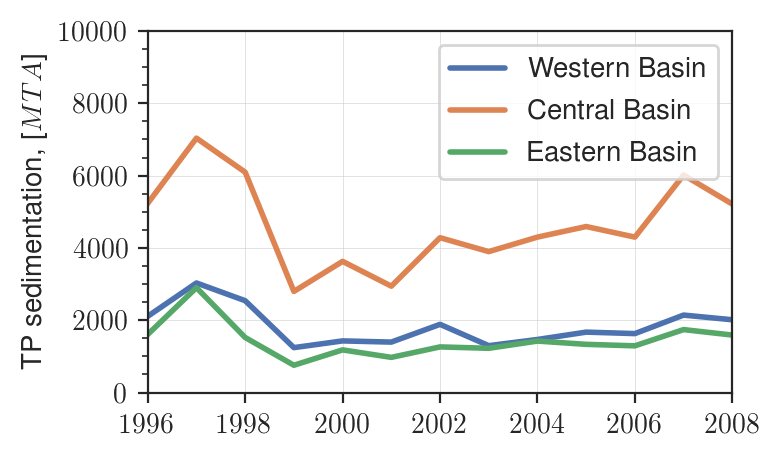

In [13]:
fig, (ax) = plt.subplots(1,1, figsize=(5*0.8,3*0.8), dpi=200)
ax.plot(L.Year, S_WB, lw=2, label='Western Basin')
# ax.scatter(TP.Year, TP.WB, s=10, label=None)
ax.plot(L.Year, S_CB, lw=2, label='Central Basin')
# ax.scatter(TP.Year, TP.CB, s=10, label=None)
ax.plot(L.Year, S_EB, lw=2, label='Eastern Basin')
# ax.scatter(TP.Year, TP.EB, s=10, label=None)
ax.legend(frameon=1, loc=1)
ax.set_ylim(0,10000)
# ax.get_xaxis().set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', linewidth=.2)
# ax.grid(b=True, which='minor', linewidth=.1)
ax.set_xlim(1996, 2008)
plt.ylabel('TP sedimentation, [$MTA$]')
# sns.despine(offset=0, trim=True)
plt.tight_layout()
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/latex/img/LE_S.pdf')

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


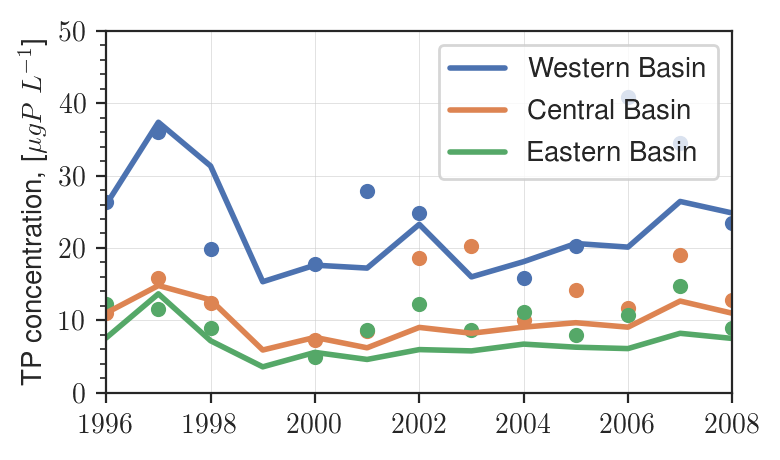

In [14]:
fig, (ax) = plt.subplots(1,1, figsize=(5*0.8,3*0.8), dpi=200)
ax.plot(L.Year, TP_WB, lw=2, label='Western Basin')
ax.scatter(TP.Year, TP.WB, s=20, label=None)
ax.plot(L.Year, TP_CB, lw=2, label='Central Basin')
ax.scatter(TP.Year, TP.CB, s=20, label=None)
ax.plot(L.Year, TP_EB, lw=2, label='Eastern Basin')
ax.scatter(TP.Year, TP.EB, s=20, label=None)
ax.legend(frameon=1, loc=1)
ax.set_ylim(0,50)
# ax.get_xaxis().set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.grid(lw=0.2)
ax.set_xlim(1996, 2008)
plt.ylabel('TP concentration, [$\mu gP$ $L^{-1}$]')
# sns.despine(offset=0, trim=True)
plt.tight_layout()
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/latex/img/LE_TP.pdf')

In [21]:
MyL = pd.read_excel('../../measurements/MyLake/MyLake.xlsx')
MyL['Date MyLake'] = pd.to_datetime(MyL['Date MyLake'], format="%Y-%m-%d")
MyL.index = MyL['Date MyLake']
MyL['Year'] = MyL['Date MyLake'].map(lambda x: x.year)
MyLy = MyL.groupby(['Year']).sum()

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


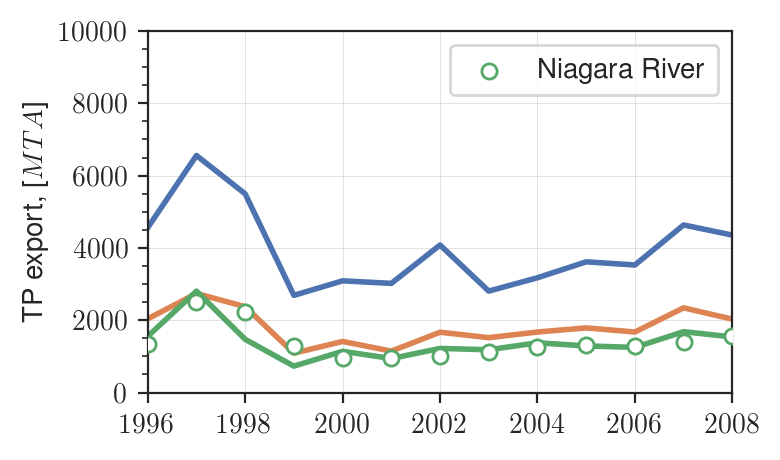

In [23]:
fig, (ax) = plt.subplots(1,1, figsize=(5*0.8,3*0.8), dpi=200)
ax.plot(L.Year, E_WB, lw=2, label='')
# ax.scatter(TP.Year, TP.WB, s=10, label=None)
ax.plot(L.Year, E_CB, lw=2, label='')
# ax.scatter(TP.Year, TP.CB, s=10, label=None)
ax.plot(L.Year, E_EB, lw=2, label='')
ax.scatter(L.Year, L['Outflow Niagra'], s=30, edgecolor=sns.color_palette()[2], facecolor='w', label='Niagara River', zorder=10)
# ax.scatter(MyLy.index, MyLy['TP load MyLake Niagara']*1e-3, marker='x', s=30, c=sns.color_palette()[2], label='MyLake', zorder=10)
ax.legend(frameon=1, loc=1)
ax.set_ylim(0,10000)
ax.grid(lw=0.2)
ax.set_xlim(1996, 2008)
plt.ylabel('TP export, [$MTA$]')
# ax.get_xaxis().set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(matplotlib.ticker.AutoMinorLocator())
# sns.despine(offset=0, trim=True)
plt.tight_layout()
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/latex/img/LE_E.pdf')